In [1]:
# import h5py
# import pandas as pd
# import numpy as np

# # Step 1: Load the data matrix and metadata from the .gctx file
# gctx_file = "../data/raw/level3_beta_ctl_n188708x12328.gctx"
# h5_file = "../data/raw/compound_control_dataset_all.h5"

# chunk_size = 10000  # Number of rows to process at a time

# with h5py.File(gctx_file, "r") as f:
#     # Access data matrix and metadata
#     data = f["/0/DATA/0/matrix"]
#     row_ids = f["/0/META/COL/id"][:].astype(str)  # All sample IDs (rows)
#     col_ids = f["/0/META/ROW/id"][:].astype(int)  # All gene IDs (columns)

#     # Load metadata files
#     gene_metadata = pd.read_csv("../data/raw/geneinfo_beta.txt", sep="\t")
#     pert_info = pd.read_csv("../data/raw/instinfo_beta.txt", sep="\t")

#     # Filter perturbation metadata
#     filtered_pert_info = pert_info[
#         (pert_info["qc_pass"] == 1.0) & (pert_info["pert_type"] == "ctl_vehicle")
#     ].copy()
#     filtered_pert_info.set_index("sample_id", inplace=True)

#     # Filter valid sample IDs
#     valid_sample_ids = pd.Index(row_ids).intersection(filtered_pert_info.index)
#     filtered_pert_info = filtered_pert_info.loc[valid_sample_ids]
#     filtered_pert_info.sort_index(inplace=True)

#     # Create a mapping of sample IDs to row indices
#     row_idx_map = {rid: idx for idx, rid in enumerate(row_ids)}

#     # Compute row indices for valid samples
#     filtered_row_indices = [row_idx_map[sid] for sid in valid_sample_ids]

# # Step 2: Write the filtered data matrix and metadata in chunks
# with h5py.File(h5_file, "w") as h5f:
#     # Pre-allocate space for the dataset in the HDF5 file
#     data_shape = (len(filtered_row_indices), len(col_ids))
#     data_dset = h5f.create_dataset(
#         "data", shape=data_shape, dtype="float32", compression="gzip"
#     )

#     # Write row (sample) metadata
#     for column in filtered_pert_info.columns:
#         h5f.create_dataset(
#             f"row_metadata/{column}",
#             data=filtered_pert_info[column].values.astype("S"),
#         )

#     # Write column (gene) metadata
#     for column in gene_metadata.columns:
#         h5f.create_dataset(
#             f"col_metadata/{column}",
#             data=gene_metadata[column].values.astype("S"),
#         )

#     # Write row and column IDs
#     h5f.create_dataset("row_ids", data=valid_sample_ids.values.astype("S"))
#     gene_mapping = gene_metadata.set_index("gene_id")["gene_symbol"].to_dict()
#     filtered_col_symbols = [gene_mapping.get(gid, f"Gene_{gid}") for gid in col_ids]
#     h5f.create_dataset(
#         "col_ids", data=[x.encode("utf-8") for x in filtered_col_symbols]
#     )

#     # Process and write data in chunks
#     for i in range(0, len(filtered_row_indices), chunk_size):
#         chunk_indices = filtered_row_indices[i : i + chunk_size]  # Current chunk
#         chunk_data = data[chunk_indices, :]  # Load chunk from the data matrix
#         data_dset[i : i + len(chunk_indices), :] = chunk_data  # Write to dataset

# print(f"Filtered data and metadata successfully written to {h5_file}.")

In [2]:
# import h5py
# import pandas as pd

# # Step 1: Load the data matrix and metadata from the .gctx file
# gctx_file = "../data/raw/level3_beta_ctl_n188708x12328.gctx"

# with h5py.File(gctx_file, "r") as f:
#     # Access the entire data matrix and metadata
#     data = f["/0/DATA/0/matrix"]
#     row_ids = f["/0/META/COL/id"][:].astype(str)  # Sample IDs (rows)
#     col_ids = f["/0/META/ROW/id"][:].astype(int)  # Gene IDs (columns)

#     # Load metadata files
#     gene_metadata = pd.read_csv("../data/raw/geneinfo_beta.txt", sep="\t")
#     pert_info = pd.read_csv("../data/raw/instinfo_beta.txt", sep="\t")

#     # Filter perturbation metadata
#     filtered_pert_info = pert_info[
#         (pert_info["qc_pass"] == 1.0) & (pert_info["pert_type"] == "ctl_vehicle")
#     ].copy()
#     filtered_pert_info.set_index("sample_id", inplace=True)

#     # STEP A: Reduce filtered_pert_info to match row_ids
#     subset_row_ids = pd.Index(row_ids)
#     subset_row_ids = subset_row_ids.intersection(filtered_pert_info.index)
#     subset_pert_info = filtered_pert_info.loc[subset_row_ids].copy()
#     subset_pert_info.sort_index(inplace=True)

#     # Keep a separate column for sample_id (while retaining it as index)
#     subset_pert_info["sample_id"] = subset_pert_info.index

#     # STEP B: Recompute the row indices in the data matrix for valid sample_ids
#     row_idx_map = {rid: idx for idx, rid in enumerate(row_ids)}
#     filtered_row_indices = [row_idx_map[sid] for sid in subset_pert_info.index]

#     # Filter the data matrix to match the final subset of row indices
#     filtered_data_matrix = data[filtered_row_indices, :]

# # Step 2: Map gene IDs to gene symbols
# gene_mapping = gene_metadata.set_index("gene_id")["gene_symbol"].to_dict()
# filtered_col_symbols = [gene_mapping.get(gid, f"Gene_{gid}") for gid in col_ids]

# # Step 3: Write the filtered data and metadata to an HDF5 file
# h5_file = "../data/raw/compound_control_dataset.h5"

# with h5py.File(h5_file, "w") as h5f:
#     # Write the filtered data matrix
#     h5f.create_dataset("data", data=filtered_data_matrix, compression="gzip")

#     # Write row (sample) metadata
#     for column in subset_pert_info.columns:
#         h5f.create_dataset(
#             f"row_metadata/{column}",
#             data=subset_pert_info[column].values.astype("S"),
#         )

#     # Write column (gene) metadata
#     for column in gene_metadata.columns:
#         h5f.create_dataset(
#             f"col_metadata/{column}",
#             data=gene_metadata[column].values.astype("S"),
#         )

#     # Write final row and column IDs
#     h5f.create_dataset("row_ids", data=subset_pert_info.index.values.astype("S"))
#     h5f.create_dataset(
#         "col_ids", data=[x.encode("utf-8") for x in filtered_col_symbols]
#     )

# print(f"Filtered data and metadata successfully written to {h5_file}.")

In [3]:
# h5_file = "../data/raw/compound_control_dataset.h5"
# with h5py.File(h5_file, "r") as h5f:
#     # Load the data matrix
#     data_matrix = h5f["data"][:]

#     # Decode row metadata
#     row_metadata = {
#         key: h5f[f"row_metadata/{key}"][:].astype(str) for key in h5f["row_metadata"]
#     }

#     # Decode column metadata
#     col_metadata = {
#         key: h5f[f"col_metadata/{key}"][:].astype(str) for key in h5f["col_metadata"]
#     }

#     # Load and decode row and column IDs
#     row_ids = h5f["row_ids"][:].astype(str)
#     col_ids = h5f["col_ids"][:].astype(str)

# # Convert metadata to DataFrames for ease of use (optional)
# import pandas as pd

# row_metadata_df = pd.DataFrame(row_metadata)
# col_metadata_df = pd.DataFrame(col_metadata)


In [1]:
# Add src to path
import logging
import sys
import os

import torch

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join("..", "src")))
from utils import create_smiles_dict

from deepchem.feat.smiles_tokenizer import SmilesTokenizer
from torch.utils.data import DataLoader, random_split
from data_sets import PerturbationDataset
import pandas as pd
from training import train_multimodal_model
from perturbinator import Perturbinator
import numpy as np
import matplotlib.pyplot as plt
from evaluation import evaluate_multimodal_model

device = "cuda" if torch.cuda.is_available() else "cpu"

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'dgl'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'haiku'


In [38]:
# Load the datasets
controls = "../data/raw/compound_control_dataset.h5"
perturbations = "../data/raw/compound_pertubation_dataset.h5"

# Load the SMILES data and create a dictionary mapping
smiles_df = pd.read_csv("../data/raw/compoundinfo_beta.txt", sep="\t")
smiles_dict = create_smiles_dict(smiles_df)

# Load the SMILES tokenizer
vocab_file = ("../data/raw/vocab.txt" )
smiles_tokenizer = SmilesTokenizer(vocab_file=vocab_file)

# Analyze SMILES string lengths to determine an appropriate max_length
smiles_lengths = [len(smile) for smile in smiles_dict.values()]
max_length = min(max(smiles_lengths), 128)

# Check some SMILES strings to tokens
smiles = list(smiles_dict.values())
tokens = smiles_tokenizer.encode(
    smiles[13],
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding="max_length",
    return_tensors="pt",
)
tokens

tensor([[12, 16, 19, 15, 20, 15, 15, 15, 15, 17, 19, 16, 18, 15, 20, 31, 15, 20,
         15, 15, 17, 25, 25, 20, 31, 15, 20, 15, 15, 25, 15, 21, 15, 15, 17, 28,
         18, 15, 15, 15, 20, 21, 18, 16, 17, 22, 19, 18, 23, 16, 20, 17, 16, 21,
         16, 16, 26, 16, 16, 17, 16, 21, 18, 16, 16, 20, 16, 26, 18, 16, 17, 19,
         18, 22, 19, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0]])

In [ ]:
dataset = PerturbationDataset(
    controls_file=controls,
    perturbations_file=perturbations,
    smiles_dict=smiles_dict,
    plate_column="det_plate",
    normalize=True,
    n_rows=10000,
    pairing="random",
    landmark_only=True,
    tokenizer=smiles_tokenizer,
)

# Split the dataset into train, validation, and test sets
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

total_len = len(dataset)
train_size = int(train_ratio * total_len)
val_size = int(val_ratio * total_len)
test_size = total_len - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    dataset, [train_size, val_size, test_size]
)

# Log the sizes of the datasets
logging.debug(
    f"Train Dataset: {len(train_dataset)}, Val Dataset: {len(val_dataset)}, Test Dataset: {len(test_dataset)}"
)

In [ ]:
batch_size = 256
train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, num_workers=0
)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, num_workers=0
)

test_loader = DataLoader(
    test_dataset, batch_size=batch_size, shuffle=False, num_workers=0
)

Features Shape: torch.Size([256, 978])
Labels Shape: torch.Size([256, 978])
Metadata sample: {'bead_batch': ['b32', 'b15', 'b32', 'b34', 'b32', 'b32', 'b34', 'b32', 'b32', 'b32', 'b32', 'b32', 'b32', 'b32', 'b15', 'b15', 'b32', 'b32', 'b32', 'b34', 'b34', 'b32', 'b32', 'b32', 'b34', 'b34', 'b32', 'b34', 'b32', 'b32', 'b34', 'b15', 'b32', 'b15', 'b34', 'b34', 'b32', 'b15', 'b32', 'b32', 'b32', 'b32', 'b32', 'b32', 'b32', 'b34', 'b32', 'b32', 'b32', 'b34', 'b32', 'b34', 'b32', 'b32', 'b34', 'b34', 'b34', 'b32', 'b34', 'b15', 'b34', 'b32', 'b34', 'b34', 'b32', 'b32', 'b32', 'b34', 'b32', 'b34', 'b34', 'b32', 'b32', 'b15', 'b34', 'b32', 'b32', 'b32', 'b34', 'b15', 'b32', 'b32', 'b32', 'b32', 'b15', 'b32', 'b34', 'b32', 'b32', 'b32', 'b32', 'b34', 'b34', 'b32', 'b15', 'b32', 'b15', 'b34', 'b32', 'b32', 'b34', 'b34', 'b34', 'b34', 'b32', 'b32', 'b32', 'b32', 'b32', 'b34', 'b34', 'b32', 'b34', 'b32', 'b32', 'b34', 'b32', 'b32', 'b32', 'b32', 'b34', 'b15', 'b32', 'b32', 'b32', 'b32', 'b32', 'b

In [8]:
# Initialize the Perturbinator
model = Perturbinator(
    gene_dim=978,
    gene_hidden_dim=512,
    drug_hidden_dim=128,
)

# Criterion and Optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", patience=3
)

train_losses, val_losses = train_multimodal_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    epochs=20,
    device=device,
    gradient_clipping=1.0,
    early_stopping_patience=5,
    model_name="Perturbinator",
    use_mixed_precision=True,
)

# Log the final train and validation losses
logging.debug("Final train and validation losses:")
logging.debug("Train Losses: ", train_losses)
logging.debug("Validation Losses: ", val_losses)

c:\Users\20191678\AppData\Local\miniconda3\envs\5ARG45\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
Training Progress: 100%|██████████| 20/20 [45:44<00:00, 137.25s/it]

Training complete. Best model restored. Final train and val losses:
Train: [0.04202981264230229, 0.012784749896550207, 0.011335682249339096, 0.010201103359178992, 0.009857453274946146, 0.009458514152895134, 0.008677527718544903, 0.008148766418542381, 0.007729064618605762, 0.007264573202895617, 0.006862478387312675, 0.006580669474180162, 0.0063493111071944545, 0.006197643768082893, 0.00597282497540302, 0.0056589050273175975, 0.005393635911493639, 0.005224235685066356, 0.0051032606835782245, 0.00496489574573854]
Val: [0.013522824050117297, 0.012270953349245831, 0.010492533712607364, 0.010072136135229897, 0.00978220066423201, 0.009333231633398246, 0.008470119262444335, 0.008083033145570436, 0.007665504335136119, 0.007174937399010794, 0.0068814819566531725, 0.006571674678337614, 0.006553611135963712, 0.006161339812753193, 0.005853376626021488, 0.0055768244407672345, 0.005422495630410902, 0.0052098407301067505, 0.005205877913928351, 0.0049307968648131875]


In [14]:

# Evaluate on test set
test_metrics = evaluate_multimodal_model(model, test_loader,criterion=criterion, device=device)
logging.debug("Test Metrics: ", test_metrics)

Training complete. Best model restored. Final train and val losses:
Train: [0.04202981264230229, 0.012784749896550207, 0.011335682249339096, 0.010201103359178992, 0.009857453274946146, 0.009458514152895134, 0.008677527718544903, 0.008148766418542381, 0.007729064618605762, 0.007264573202895617, 0.006862478387312675, 0.006580669474180162, 0.0063493111071944545, 0.006197643768082893, 0.00597282497540302, 0.0056589050273175975, 0.005393635911493639, 0.005224235685066356, 0.0051032606835782245, 0.00496489574573854]
Val: [0.013522824050117297, 0.012270953349245831, 0.010492533712607364, 0.010072136135229897, 0.00978220066423201, 0.009333231633398246, 0.008470119262444335, 0.008083033145570436, 0.007665504335136119, 0.007174937399010794, 0.0068814819566531725, 0.006571674678337614, 0.006553611135963712, 0.006161339812753193, 0.005853376626021488, 0.0055768244407672345, 0.005422495630410902, 0.0052098407301067505, 0.005205877913928351, 0.0049307968648131875]
Test MSE: 0.004870931752384665
Test

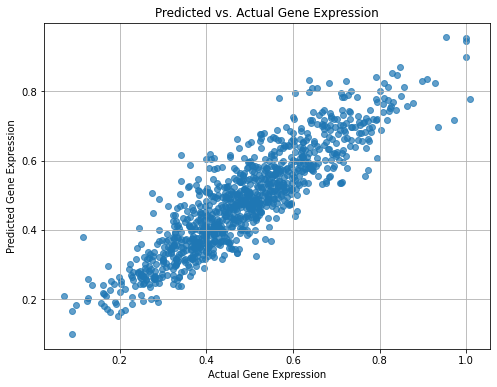

0.30792958 0.3731245


In [16]:
# Get some predictions from the test set
model.eval()
with torch.no_grad():
    for batch_data in test_loader:
        features = batch_data["features"].to(device)
        labels = batch_data["labels"].to(device)
        smiles_list = batch_data["smiles_tokens"].to(device)

        # Forward pass
        preds = model(features, smiles_list)  # shape (B, #genes)

        # Move to CPU for easy concatenation
        preds = preds.cpu().numpy()
        labels = labels.cpu().numpy()
        break

# Select a random sample
sample_idx = np.random.randint(0, len(preds))
sample_pred = preds[sample_idx]
sample_label = labels[sample_idx]

# Plot the predicted vs. actual gene expression
plt.figure(figsize=(8, 6))
plt.scatter(sample_label, sample_pred, alpha=0.7)
plt.xlabel("Actual Gene Expression")
plt.ylabel("Predicted Gene Expression")
plt.title("Predicted vs. Actual Gene Expression")
plt.grid(True)
plt.show()

print(sample_pred[0], sample_label[0])